In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

import pickle, os

In [3]:
train = pd.read_csv('data/train_8_12.csv', index_col=[0])
X_train = train.drop(["win", "matchId"], axis=1)
y_train = train['win'].astype(int)

test = pd.read_csv('data/test_8_12.csv', index_col=[0])
X_test = test.drop(["win", "matchId"], axis=1)
y_test = test['win'].astype(int)

## GridSearch CV for RandomForest

In [41]:
rf_file = "models/rf_cv.pkl"

if os.path.exists(rf_file):
    with open(rf_file, "rb") as f:
        grid = pickle.load(f)
else:
    rf = RandomForestClassifier(random_state=42)
    param_grid = {"n_estimators": np.linspace(150, 190, 40).astype(int),
                "max_depth": [8, 9]}
    grid = GridSearchCV(rf, param_grid, scoring="accuracy", n_jobs=-1, verbose=3, cv=10)
    grid.fit(X_train, y_train)
    with open(rf_file, "wb") as f:
        pickle.dump(grid, f)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
[CV 1/10] END ....max_depth=8, n_estimators=150;, score=0.698 total time=   1.5s
[CV 2/10] END ....max_depth=8, n_estimators=150;, score=0.755 total time=   1.5s
[CV 3/10] END ....max_depth=8, n_estimators=150;, score=0.604 total time=   1.5s
[CV 4/10] END ....max_depth=8, n_estimators=150;, score=0.679 total time=   1.5s
[CV 5/10] END ....max_depth=8, n_estimators=150;, score=0.736 total time=   1.4s
[CV 7/10] END ....max_depth=8, n_estimators=150;, score=0.755 total time=   1.4s
[CV 6/10] END ....max_depth=8, n_estimators=150;, score=0.698 total time=   1.5s
[CV 8/10] END ....max_depth=8, n_estimators=150;, score=0.615 total time=   1.4s
[CV 1/10] END ....max_depth=8, n_estimators=151;, score=0.698 total time=   0.9s
[CV 9/10] END ....max_depth=8, n_estimators=150;, score=0.673 total time=   0.9s
[CV 2/10] END ....max_depth=8, n_estimators=151;, score=0.736 total time=   0.9s
[CV 10/10] END ...max_depth=8, n_estimators=15

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [8, 9],
                         'n_estimators': array([150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
       190])},
             scoring='accuracy', verbose=3)

<AxesSubplot:xlabel='param_n_estimators', ylabel='mean_test_score'>

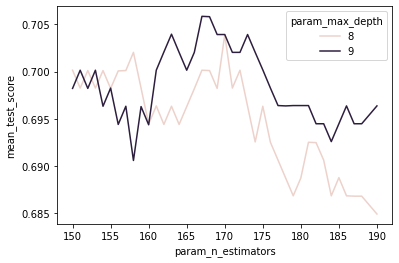

In [51]:
rf_cv_result = pd.DataFrame(grid.cv_results_)
final_rf = grid.best_estimator_

sns.lineplot(x="param_n_estimators", y="mean_test_score", hue="param_max_depth", data=rf_cv_result)

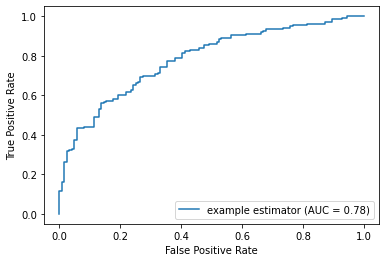

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, final_rf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

In [66]:
with open("models/rf_cv.pkl", "wb") as f:    
    pickle.dump(grid, f)